In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_sine'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

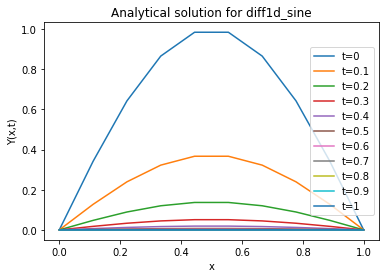

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

         Current function value: 0.062910
         Iterations: 7010
         Function evaluations: 7543
         Gradient evaluations: 7531
20min 18s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.06290952045720768
 hess_inv: array([[ 1.56820317e+00,  1.44791461e-01,  1.04174162e-01, ...,
         1.14435454e+02, -4.29130682e+03, -2.96582651e+03],
       [ 1.29661290e-01,  1.28883824e-01,  1.13390081e-02, ...,
         5.63586223e+01, -1.08413309e+03, -7.45997757e+02],
       [ 9.25909991e-02,  1.32429132e-02,  6.78838139e-01, ...,
         1.87052967e+02, -7.46268396e+03, -5.16670902e+03],
       ...,
       [ 1.27556304e+02,  5.57290052e+01,  1.97262242e+02, ...,
         1.89660284e+05, -3.87491479e+06, -2.73862170e+06],
       [-4.01642066e+03, -1.04049751e+03, -7.39861481e+03, ...,
        -3.70917154e+06,  1.22796104e+08,  8.55866935e+07],
       [-2.79145623e+03, -7.13655699e+02, -5.12804396e+03, ...,
        -2.62515457e+06,  8.56286120e+07,  5.97236516e+

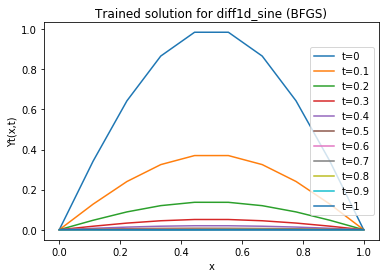

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

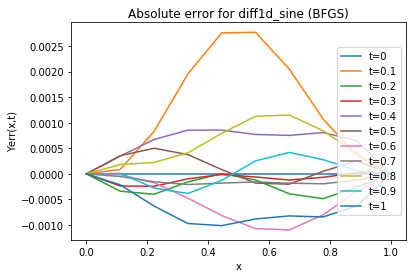

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [10]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

         Current function value: 0.062910
         Iterations: 7010
         Function evaluations: 7543
         Gradient evaluations: 7531
21min 55s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.06290952045720768
 hess_inv: array([[ 1.56820317e+00,  1.44791461e-01,  1.04174162e-01, ...,
         1.14435454e+02, -4.29130682e+03, -2.96582651e+03],
       [ 1.29661290e-01,  1.28883824e-01,  1.13390081e-02, ...,
         5.63586223e+01, -1.08413309e+03, -7.45997757e+02],
       [ 9.25909991e-02,  1.32429132e-02,  6.78838139e-01, ...,
         1.87052967e+02, -7.46268396e+03, -5.16670902e+03],
       ...,
       [ 1.27556304e+02,  5.57290052e+01,  1.97262242e+02, ...,
         1.89660284e+05, -3.87491479e+06, -2.73862170e+06],
       [-4.01642066e+03, -1.04049751e+03, -7.39861481e+03, ...,
        -3.70917154e+06,  1.22796104e+08,  8.55866935e+07],
       [-2.79145623e+03, -7.13655699e+02, -5.12804396e+03, ...,
        -2.62515457e+06,  8.56286120e+07,  5.97236516e+

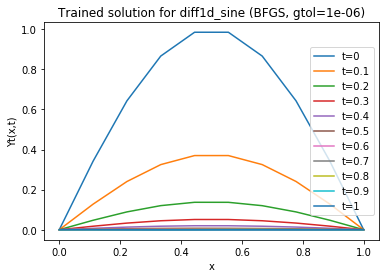

In [11]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

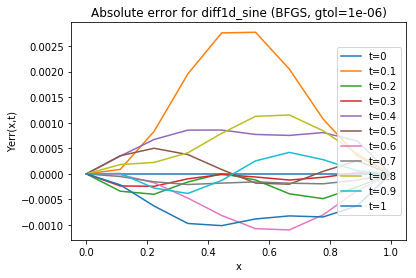

In [12]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));